# First try to apply classification

### The purpose of this notebook is to test a few different models on our dataset, for each normalisation method used in the previous notebook

---

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
np.random.seed(12345678)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [3]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import learning_curve

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import glob

In [10]:
import sys
sys.path.append('/home/vincentm/MLnotebooks/metabopipeline_notebooks/bin/')
from missing_value_imputation_functions import *
from normalisation_scaling_functions import *

from sklearn.linear_model import BayesianRidge

## Define useful functions for the analysis

In [6]:
def evaluation(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
    
    fig = plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    #display(fig)
    plt.legend()
    
    plt.show()

In [11]:
peakTable_HILIC_POS = pd.read_csv('/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/original_peak_table/peakTable_HILIC_POS.csv', sep=',', decimal='.', na_values='NA')
metadata = peakTable_HILIC_POS.iloc[:, ['variable' not in col for col in peakTable_HILIC_POS.columns]]
X = peakTable_HILIC_POS.iloc[:, ['variable' in col for col in peakTable_HILIC_POS.columns]]

X_python_BayesianRidge = python_MICE_imputer(X, BayesianRidge())
X_python_BayesianRidge_norml2 = normPeakTable(X_python_BayesianRidge, 'l2_normalisation', based='samples')
X_python_BayesianRidge_norml2_autoscaling = normPeakTable(X_python_BayesianRidge_norml2, 'autoscaling', based='metabolites')

peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling = pd.concat([metadata, X_python_BayesianRidge_norml2_autoscaling], axis=1)
peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling.to_csv('/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/whole_preprocessed_peak_tables/' + 'peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling.csv', header=True, index=False)
peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling

/home/vincentm/.local/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


----- 7.6 seconds -----


,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,LivCan_153,Incident,82,HCC/,Yes,41____41041872,41____41041872,41041872-s2#C,0.101631,-0.110446,...,-2.650986,-0.470457,0.342900,0.619527,-0.936687,-0.962937,0.770801,-0.764843,0.804232,0.794149
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,0.873766,1.842187,...,0.490258,1.146290,1.168192,-1.946913,0.933922,-0.370322,-2.081909,-0.656946,-1.769805,-1.788220
2,LivCan_267,Incident,427,HCC/,Yes,41____41074588,41____41074588,41074588-s1#B,-1.207770,2.336901,...,-0.256537,-0.842461,-1.256046,0.853134,-0.830857,-0.572614,0.858284,-0.493164,0.782271,0.840564
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,-0.866739,2.074640,...,-0.563390,-0.922491,0.264664,0.729150,-0.877095,-2.812856,0.822192,-0.760844,0.786209,0.763677
4,LivCan_299,Incident,376,HCC_Wide/,Yes,21____21103888,21____21103888,21103888-s1#B,1.006066,0.539067,...,0.027488,-0.138429,-0.447878,1.029010,0.535204,-0.481001,1.032368,0.126096,1.053962,1.140579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C,1.585423,0.518839,...,-0.826761,-2.577485,0.808422,-1.586865,0.254505,0.456315,-1.504300,0.537731,-1.688567,-1.275595
182,LivCan_375,Incident,383,HCC/,Yes,22____22281416,22____22281416,22281416-s1#B,-0.012364,1.214087,...,0.439802,0.560632,-0.682020,-0.879584,1.624772,1.458263,-0.854010,1.196156,-0.892703,-0.735159
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B,0.283038,0.246242,...,0.690566,2.849856,-0.065759,-1.021289,0.334822,0.603647,-1.109028,0.364952,-1.164164,-1.004999
184,LivCan_165,Incident,147,HCC/,Yes,71____71000825,71____71000065,71000065-s2#C,-0.409156,0.781807,...,-0.204099,-1.442397,-0.561800,-2.151312,-1.550425,0.749423,-2.346954,0.817397,-2.162688,-1.640240


In [12]:
X_python_BayesianRidge.to_csv('/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/whole_preprocessed_peak_tables/peakTable_preprocessed_python_BayesianRidge.csv')

# Import data

In [7]:
path_peakTable = '/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/subset_peakTable/peakTable_subset.csv'

peakTable_HILIC_POS = pd.read_csv(path_peakTable, sep=',', decimal='.', na_values='NA')
peakTable_HILIC_POS

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_2141,variable_1224,variable_1587,variable_2161,variable_1582,variable_93,variable_2013,variable_455,variable_3
0,LivCan_153,Incident,82,HCC/,Yes,41____41041872,41____41041872,41041872-s2#C,15.986642,11.776399,22.727159,12.749600,23.193580,20.466638,13.973290,14.901102,19.761786
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,16.890236,NaN,22.852766,13.332274,23.309319,NaN,13.532489,13.742697,19.735279
2,LivCan_267,Incident,427,HCC/,Yes,41____41074588,41____41074588,41074588-s1#B,16.150009,12.889435,22.141968,13.484698,22.140140,20.119205,13.701981,14.248796,19.116076
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,15.888334,12.406618,22.946740,12.342481,23.152943,20.525967,13.764644,14.237655,19.376875
4,LivCan_299,Incident,376,HCC_Wide/,Yes,21____21103888,21____21103888,21103888-s1#B,15.201124,13.183449,22.107158,12.869770,22.374462,20.079482,12.445936,15.256830,19.555938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C,15.012310,NaN,22.543090,12.798442,22.715137,NaN,13.285125,13.694057,19.664978
182,LivCan_375,Incident,383,HCC/,Yes,22____22281416,22____22281416,22281416-s1#B,14.881942,11.859027,22.059927,12.858069,22.528103,20.137330,12.951560,15.459569,19.301954
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B,15.498081,NaN,22.218538,NaN,22.761386,19.873500,13.149555,15.456830,19.170626
184,LivCan_165,Incident,147,HCC/,Yes,71____71000825,71____71000065,71000065-s2#C,14.866505,NaN,22.113462,NaN,22.050695,NaN,12.779032,14.275241,18.869505


In [41]:
metadata = peakTable_HILIC_POS.iloc[:, ['variable' not in col for col in peakTable_HILIC_POS.columns]]
metadata

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC/,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC/,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide/,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC/,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC/,Yes,71____71000825,71____71000065,71000065-s2#C


In [9]:
X = peakTable_HILIC_POS.iloc[:, ['variable' in col for col in peakTable_HILIC_POS.columns]]

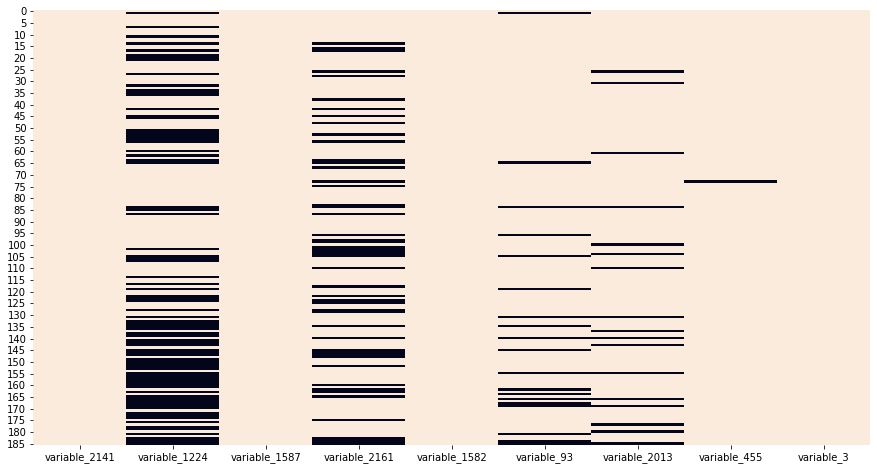

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(X.notna(), cbar=False)
plt.show()

# Impute missing values

In [10]:
from sklearn.linear_model import BayesianRidge

In [11]:
import sys
sys.path.append('/home/vincentm/MLnotebooks/metabopipeline_notebooks/bin/')
from missing_value_imputation_functions import *

In [16]:
estimators = [
    BayesianRidge()
]

In [17]:
for estimator in estimators:
    
    X_python_MICE = python_MICE_imputer(X, estimator)
    
    X_python_MICE.to_csv('/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/subset_peakTable/' + 'X_python_MICE_' + str(estimator).split('(')[0] + '.csv', index = False, header=True)

----- 0.0 seconds -----


In [26]:
X_python_BayesianRidge = X_python_MICE

X_python_BayesianRidge.isna().sum().sum()

0

# Normalise peak table

In [12]:
from normalisation_scaling_functions import *

## Sample normalisation

In [27]:
X_python_BayesianRidge_norml2 = normPeakTable(X_python_BayesianRidge, 'l2_normalisation', based='samples')
X_python_BayesianRidge_norml2

,variable_2141,variable_1224,variable_1587,variable_2161,variable_1582,variable_93,variable_2013,variable_455,variable_3
0,0.300091,0.221059,0.426619,0.239327,0.435375,0.384186,0.262297,0.279714,0.370955
1,0.315986,0.233675,0.427535,0.249423,0.436076,0.379309,0.253169,0.257101,0.369212
2,0.307956,0.245782,0.422213,0.257132,0.422178,0.383642,0.261276,0.271703,0.364514
3,0.299712,0.234034,0.432860,0.232825,0.436750,0.387195,0.259652,0.268574,0.365519
4,0.290767,0.252173,0.422865,0.246172,0.427978,0.384080,0.238065,0.291832,0.374065
...,...,...,...,...,...,...,...,...,...
181,0.286988,0.245277,0.430952,0.244666,0.434241,0.385971,0.253969,0.261787,0.375932
182,0.286064,0.227957,0.424040,0.247160,0.433040,0.387084,0.248957,0.297167,0.371026
183,0.295690,0.240255,0.423911,0.243096,0.434268,0.379170,0.250883,0.294903,0.365760
184,0.288735,0.252486,0.429485,0.245720,0.428266,0.389691,0.248193,0.277252,0.366481


In [36]:
# We want all rows to have a length equal to 1 based on l2 distance
all(np.sqrt((X_python_BayesianRidge_norml2 ** 2).sum(axis=1)))

True

## Metabolite scaling

In [35]:
X_python_BayesianRidge_norml2_autoscaling = normPeakTable(X_python_BayesianRidge_norml2, 'autoscaling', based='metabolites')
X_python_BayesianRidge_norml2_autoscaling

,variable_2141,variable_1224,variable_1587,variable_2161,variable_1582,variable_93,variable_2013,variable_455,variable_3
0,0.635303,-2.253122,-0.007708,-0.448022,0.054734,0.039923,1.151754,0.160475,0.431667
1,2.553196,-0.907125,0.127240,0.901069,0.151328,-1.051971,0.113216,-1.566026,0.163155
2,1.584269,0.384406,-0.657194,1.931217,-1.762552,-0.081859,1.035516,-0.451190,-0.560509
3,0.589656,-0.868835,0.912214,-1.316923,0.244090,0.713571,0.850765,-0.690029,-0.405709
4,-0.489698,1.066211,-0.561120,0.466702,-0.963875,0.016071,-1.605076,1.085755,0.910750
...,...,...,...,...,...,...,...,...,...
181,-0.945641,0.330546,0.631028,0.265336,-0.101332,0.439417,0.204294,-1.208281,1.198282
182,-1.057137,-1.517244,-0.387873,0.598695,-0.266819,0.688624,-0.365912,1.493077,0.442567
183,0.104391,-0.205185,-0.406902,0.055541,-0.097619,-1.083159,-0.146896,1.320256,-0.368665
184,-0.734770,1.099625,0.414723,0.406230,-0.924225,1.272323,-0.452905,-0.027480,-0.257503


# Save preprocessed peak table

In [43]:
pd.concat([metadata, X_python_BayesianRidge_norml2_autoscaling], axis=1)

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_2141,variable_1224,variable_1587,variable_2161,variable_1582,variable_93,variable_2013,variable_455,variable_3
0,LivCan_153,Incident,82,HCC/,Yes,41____41041872,41____41041872,41041872-s2#C,0.635303,-2.253122,-0.007708,-0.448022,0.054734,0.039923,1.151754,0.160475,0.431667
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,2.553196,-0.907125,0.127240,0.901069,0.151328,-1.051971,0.113216,-1.566026,0.163155
2,LivCan_267,Incident,427,HCC/,Yes,41____41074588,41____41074588,41074588-s1#B,1.584269,0.384406,-0.657194,1.931217,-1.762552,-0.081859,1.035516,-0.451190,-0.560509
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,0.589656,-0.868835,0.912214,-1.316923,0.244090,0.713571,0.850765,-0.690029,-0.405709
4,LivCan_299,Incident,376,HCC_Wide/,Yes,21____21103888,21____21103888,21103888-s1#B,-0.489698,1.066211,-0.561120,0.466702,-0.963875,0.016071,-1.605076,1.085755,0.910750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C,-0.945641,0.330546,0.631028,0.265336,-0.101332,0.439417,0.204294,-1.208281,1.198282
182,LivCan_375,Incident,383,HCC/,Yes,22____22281416,22____22281416,22281416-s1#B,-1.057137,-1.517244,-0.387873,0.598695,-0.266819,0.688624,-0.365912,1.493077,0.442567
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B,0.104391,-0.205185,-0.406902,0.055541,-0.097619,-1.083159,-0.146896,1.320256,-0.368665
184,LivCan_165,Incident,147,HCC/,Yes,71____71000825,71____71000065,71000065-s2#C,-0.734770,1.099625,0.414723,0.406230,-0.924225,1.272323,-0.452905,-0.027480,-0.257503


In [61]:
peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling = pd.concat([metadata, X_python_BayesianRidge_norml2_autoscaling], axis=1)
peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling.to_csv('/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/subset_peakTable/' + 'peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling.csv', header=True, index=False)
peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_2141,variable_1224,variable_1587,variable_2161,variable_1582,variable_93,variable_2013,variable_455,variable_3
0,LivCan_153,Incident,82,HCC/,Yes,41____41041872,41____41041872,41041872-s2#C,0.635303,-2.253122,-0.007708,-0.448022,0.054734,0.039923,1.151754,0.160475,0.431667
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,2.553196,-0.907125,0.127240,0.901069,0.151328,-1.051971,0.113216,-1.566026,0.163155
2,LivCan_267,Incident,427,HCC/,Yes,41____41074588,41____41074588,41074588-s1#B,1.584269,0.384406,-0.657194,1.931217,-1.762552,-0.081859,1.035516,-0.451190,-0.560509
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,0.589656,-0.868835,0.912214,-1.316923,0.244090,0.713571,0.850765,-0.690029,-0.405709
4,LivCan_299,Incident,376,HCC_Wide/,Yes,21____21103888,21____21103888,21103888-s1#B,-0.489698,1.066211,-0.561120,0.466702,-0.963875,0.016071,-1.605076,1.085755,0.910750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C,-0.945641,0.330546,0.631028,0.265336,-0.101332,0.439417,0.204294,-1.208281,1.198282
182,LivCan_375,Incident,383,HCC/,Yes,22____22281416,22____22281416,22281416-s1#B,-1.057137,-1.517244,-0.387873,0.598695,-0.266819,0.688624,-0.365912,1.493077,0.442567
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B,0.104391,-0.205185,-0.406902,0.055541,-0.097619,-1.083159,-0.146896,1.320256,-0.368665
184,LivCan_165,Incident,147,HCC/,Yes,71____71000825,71____71000065,71000065-s2#C,-0.734770,1.099625,0.414723,0.406230,-0.924225,1.272323,-0.452905,-0.027480,-0.257503


# Classification

In [69]:
def pipeline():
    
    for normalized_peakTable_file in glob.glob('/home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/subset_peakTable/peakTable_preprocessed_*.csv'):
        
        print(180*'-')
        print(20*'-', normalized_peakTable_file)
        print(180*'-')
        
        # Import normalized peakTable
        peakTable_normalized = pd.read_csv(normalized_peakTable_file, sep=',')
        
        # Split into train and test sets
        code = {'Incident':1,'Non-case':0}
        y = peakTable_normalized['Groups']
        y = y.map(code)
        X = peakTable_normalized.iloc[:, ['variable' in col for col in peakTable_normalized.columns]]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0, stratify=y)
        
        # Create and evaluate models
        prepocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
        
        RandomForest = make_pipeline(prepocessor, RandomForestClassifier(random_state=0))
        AdaBoost = make_pipeline(prepocessor, AdaBoostClassifier(random_state=0))
        SVM = make_pipeline(prepocessor, StandardScaler(), SVC(random_state=0))
        KNN = make_pipeline(prepocessor, StandardScaler(), KNeighborsClassifier())
        
        dict_models = {'RandomForest': RandomForest,
               'AdaBoost' : AdaBoost,
               'SVM': SVM,
               'KNN': KNN
              }
        
        for name, model in dict_models.items():
            print(name)
            evaluation(model, X_train, X_test, y_train, y_test)
            print(100*'-')
          
        
        print(3*'\n')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------- /home/vincentm/MLnotebooks/metabopipeline_notebooks/data/peakTable/subset_peakTable/peakTable_preprocessed_python_BayesianRidge_norml2_autoscaling.csv
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForest
[[15  4]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.71      0.53      0.61        19

    accuracy                           0.66        38
   macro avg       0.67      0.66      0.65        38
weighted avg       0.67      0.66      0.65        38



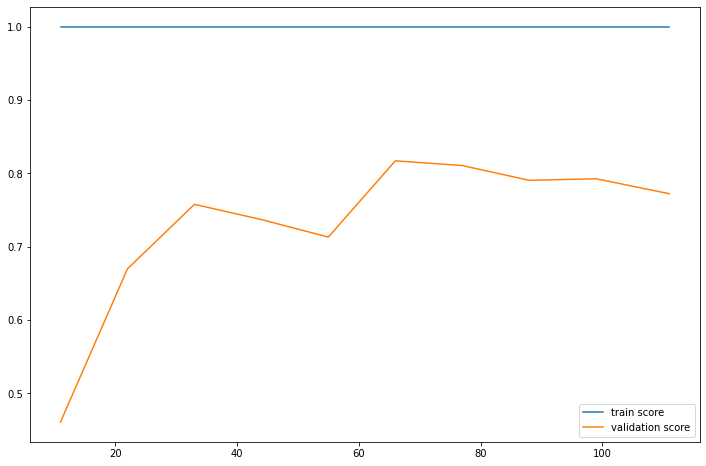

----------------------------------------------------------------------------------------------------
AdaBoost
[[18  1]
 [11  8]]
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        19
           1       0.89      0.42      0.57        19

    accuracy                           0.68        38
   macro avg       0.75      0.68      0.66        38
weighted avg       0.75      0.68      0.66        38



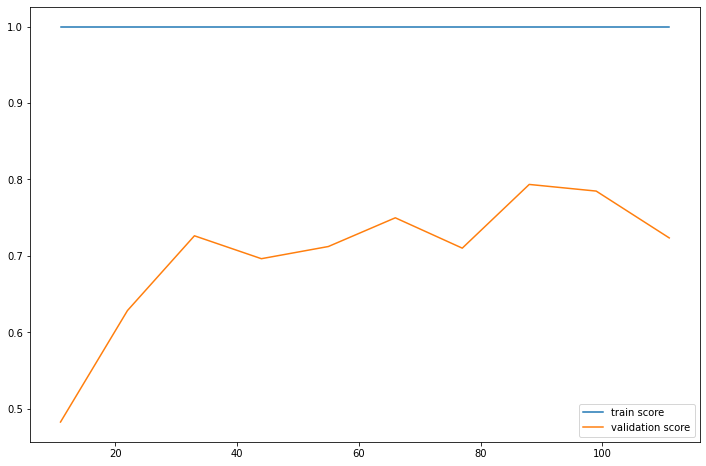

----------------------------------------------------------------------------------------------------
SVM
[[17  2]
 [11  8]]
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        19
           1       0.80      0.42      0.55        19

    accuracy                           0.66        38
   macro avg       0.70      0.66      0.64        38
weighted avg       0.70      0.66      0.64        38



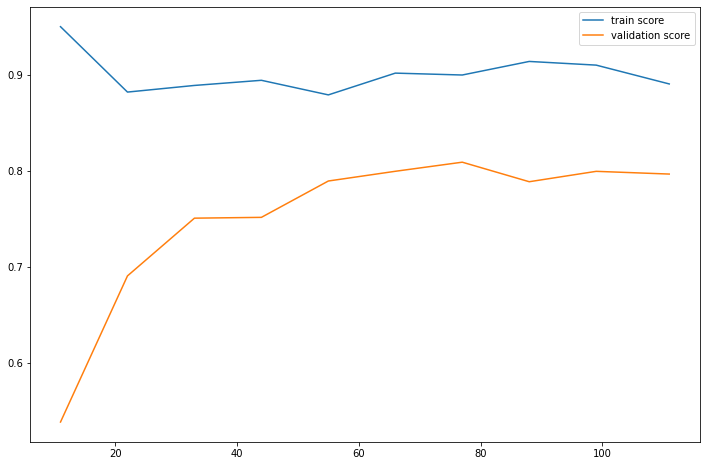

----------------------------------------------------------------------------------------------------
KNN
[[17  2]
 [10  9]]
              precision    recall  f1-score   support

           0       0.63      0.89      0.74        19
           1       0.82      0.47      0.60        19

    accuracy                           0.68        38
   macro avg       0.72      0.68      0.67        38
weighted avg       0.72      0.68      0.67        38



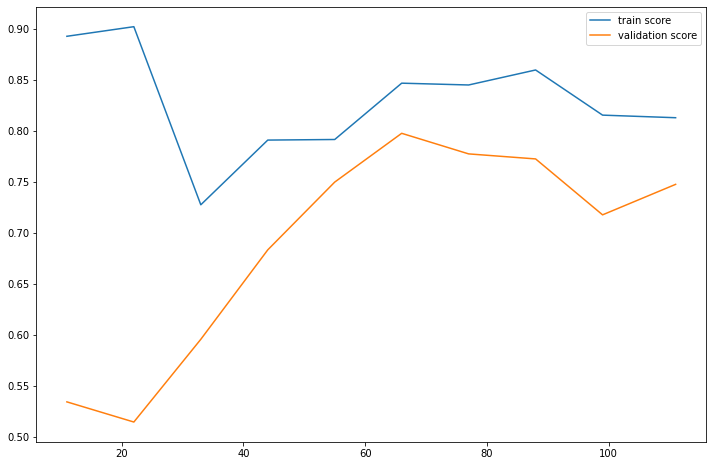

----------------------------------------------------------------------------------------------------






In [74]:
pipeline()